# **Superstore Sales Analysis - Case Study**

### **Assumptions** 
###### 1) As there is no data corresponding detail(product_id) with respect to order_id in returns table, considering the entire order is returned


### **Part 1: Python Analysis (Exploratory Data Analysis & Insights)**
##### Analysis of the dataset using Pandas, NumPy, Matplotlib, and Seaborn to extract meaningful insights.

### **Step 1: Importing Required Libraries & Loading Data**

In [733]:
pip install notebook

Note: you may need to restart the kernel to use updated packages.


In [6]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Step 2: Dataset Overview
This analysis is based on the **Superstore Sales Dataset**, which contains detailed transactional data about sales, shipping, customers, and product information.

The dataset consists of Orders, People, Returns sheets in an **Excel file**, with the primary sheet used for analysis being **"Orders"**.

---

## Data Defintion

| Index | Column Name          | Description |
|--------|---------------------|-------------|
| 1 | **Row ID** | Unique identifier for each row in the dataset. |
| 2 | **Order ID** | Unique identifier for each order placed. |
| 3 | **Order Date** | The date when the order was placed. |
| 4 | **Ship Date** | The date when the order was shipped. |
| 5 | **Ship Mode** | The shipping method used for delivery (Standard Class, Second Class, etc.). |
| 6 | **Customer ID** | Unique identifier assigned to each customer. |
| 7 | **Customer Name** | Full name of the customer who placed the order. |
| 8 | **Segment** | The market segment of the customer (Consumer, Corporate, or Home Office). |
| 9 | **Country/Region** | The country or region where the customer is located. |
| 10 | **City** | The city where the customer is located. |
| 11 | **State** | The state where the customer is located. |
| 12 | **Postal Code** | The postal code of the customer's location. |
| 13 | **Region** | The region where the customer is located (West, East, Central, South). |
| 14 | **Product ID** | Unique identifier for each product in the dataset. |
| 15 | **Category** | The broad category of the product (Furniture, Office Supplies, or Technology). |
| 16 | **Sub-Category** | The specific sub-category of the product (e.g., Chairs, Phones, Tables, etc.). |
| 17 | **Product Name** | The name of the product sold. |
| 18 | **Sales** | The total revenue generated from the sale of a product. |
| 19 | **Quantity** | The number of units sold for the product. |
| 20 | **Discount** | The percentage of discount applied to the product. |
| 21 | **Profit** | The net profit generated from the sale of the product. |


In [59]:
# Creating dataframe for each table
orders=pd.read_excel('CaseStudy.xlsx', sheet_name=0)

people=pd.read_excel('CaseStudy.xlsx', sheet_name=1)

returns=pd.read_excel('CaseStudy.xlsx', sheet_name=2)

### Performing data cleaning, handling missing values, and feature engineering

In [ ]:
# checking the shape of the sheet
orders.shape
people.shape
returns.shape

In [ ]:
# checking the data types for orders table
orders.info()

# checking the data types for people table
people.info()

# checking the data types for returns table
returns.info()

In [ ]:
# checking for any missing values in orders table
orders[orders.isna().any(axis=1)]

# checking for any missing values in people table
people[people.isna().any(axis=1)]

# checking for any missing values in returns table
returns[returns.isna().any(axis=1)]

In [ ]:
# chekcing for duplicate records in orders table
orders.duplicated().sum() 

# chekcing for duplicate records in people table
people.duplicated().sum()

# chekcing for duplicate records in returns table
returns.duplicated().sum()

In [75]:
# removed duplicates from the returns table
returns.drop_duplicates(inplace=True)

In [ ]:
#checking for the outliers in sales variable
orders['Sales'].describe()

#checking for the outliers in Quantity variable
orders['Quantity'].describe()

#checking for the outliers in Discount variable
orders['Discount'].describe()

#checking for the outliers in Profit variable
orders['Profit'].describe()

In [134]:
#removing the returned customers
ord_aft_rtn=orders.merge(returns,
             how='left',
             on='Order ID')

In [ ]:
ord_aft_rtn=ord_aft_rtn.loc[ord_aft_rtn['Returned'] != 'Yes']
ord_aft_rtn

In [187]:
ord_aft_rtn.to_excel('After_return.xlsx')

## Customers who have purchased from fewer categories compared to the average customer.

In [751]:
# grouping the customers based on their categories count
cust_fewer = ord_aft_rtn.groupby('Customer ID')['Sub-Category'].nunique().reset_index()

# avg customer
# cust_fewer['Sub-Category'].sum()/cust_fewer['Customer ID'].nunique()

#customer list who have purchased from fewer categories compared to the average customer
cust_fewer1 = cust_fewer.loc[cust_fewer['Sub-Category'] < cust_fewer['Sub-Category'].median()]
cust_fewer1

,Customer ID,Sub-Category
4,AB-10015,5
7,AB-10150,6
11,AC-10420,4
12,AC-10450,5
14,AC-10660,4
...,...,...
790,VM-21835,6
791,VP-21730,3
793,VS-21820,5
798,YC-21895,6


## Are there high-value customers who purchase from limited categories?

In [770]:
#High value customers based on Sales
High_cust_s = ord_aft_rtn.groupby('Customer ID')['Sales'].sum().reset_index()
High_cust_s.sort_values('Sales', ascending=False, inplace=True)

# top 10% sales contributing customers 
High_cust_s1 = High_cust_s.loc[High_cust_s['Sales'].cumsum() < (High_cust_s['Sales'].sum() - High_cust_s['Sales'].sum()*.9)]

# merging the top10% customers and their corresponding categ diversity
High_cust_s2=High_cust_s1.merge(cust_fewer,
             how='left',
             on='Customer ID')

High_cust_s2.sort_values('Sub-Category', inplace=True)

,Customer ID,Sales,Sub-Category
1,TC-20980,18951.820,6
8,CC-12370,12129.072,6
6,HL-15040,12873.298,7
2,TA-21385,14595.620,8
5,SC-20095,13575.424,8
0,SM-20320,24516.600,9
4,AB-10105,13881.263,9
14,KF-16285,10604.266,9
9,TS-21370,11891.751,10
7,SE-20110,12209.438,11


In [778]:
#High value customers based on profit
High_cust_p = ord_aft_rtn.groupby('Customer ID')['Profit'].sum().reset_index()
High_cust_p.sort_values('Profit', ascending=False, inplace=True)

# top 10% sales contributing customers 
High_cust_p1 = High_cust_p.loc[High_cust_p['Profit'].cumsum() < (High_cust_p['Profit'].sum() - High_cust_p['Profit'].sum()*.9)]

# merging the top10% customers and their corresponding categ diversity
High_cust_p2=High_cust_p1.merge(cust_fewer,
             how='left',
             on='Customer ID')

High_cust_p2.sort_values('Sub-Category', inplace=True)
High_cust_p2

,Customer ID,Profit,Sub-Category
0,TC-20980,8998.6495,6
2,HL-15040,5622.4292,7
1,SC-20095,5631.6252,8
3,AB-10105,5427.2941,9


## Sales & Profitability Trends and Gaps
###    Which regions have lower-than-expected sales despite a large customer base?


In [810]:
Region_sale=ord_aft_rtn.groupby('Region')['Sales'].sum().reset_index()

Region_cust=ord_aft_rtn.groupby('Region')['Customer ID'].nunique().reset_index()

Region_cust_sal=Region_sale.merge(Region_cust,
             how='left',
             on='Region')

Region_cust_sal1 = Region_cust_sal.loc[Region_cust_sal['Sales'].mean() > Region_cust_sal['Sales']]

Region_cust_sal2 = Region_cust_sal1.loc[Region_cust_sal1['Customer ID'].max() == Region_cust_sal['Customer ID']]
Region_cust_sal2

,Region,Sales,Customer ID
0,Central,489163.6934,624


# Identify customers who frequently purchase but have missed certain product categories.

In [818]:
cust_freq = ord_aft_rtn.groupby('Customer ID')['Order ID'].nunique().reset_index()

cust_freq.sort_values('Order ID', ascending=False, inplace=True)

cust_freq1 = cust_freq.loc[cust_freq['Order ID'].cumsum() < (cust_freq['Order ID'].sum() - cust_freq['Order ID'].sum()*.9)]

cust_freq2=ord_aft_rtn.loc[:,['Customer ID','Sub-Category']]
cust_freq2=cust_freq2.drop_duplicates()
cust_freq2['flag']=1
cust_freq2 = cust_freq2.pivot(index='Customer ID', columns='Sub-Category', values='flag' )
cust_freq2 = cust_freq2.fillna(0)

cust_freq3=cust_freq1.merge(cust_freq2,
             how='left',
             on='Customer ID')

cust_freq3.drop('Order ID', axis=1, inplace=True)
cust_freq3.set_index('Customer ID', inplace=True)


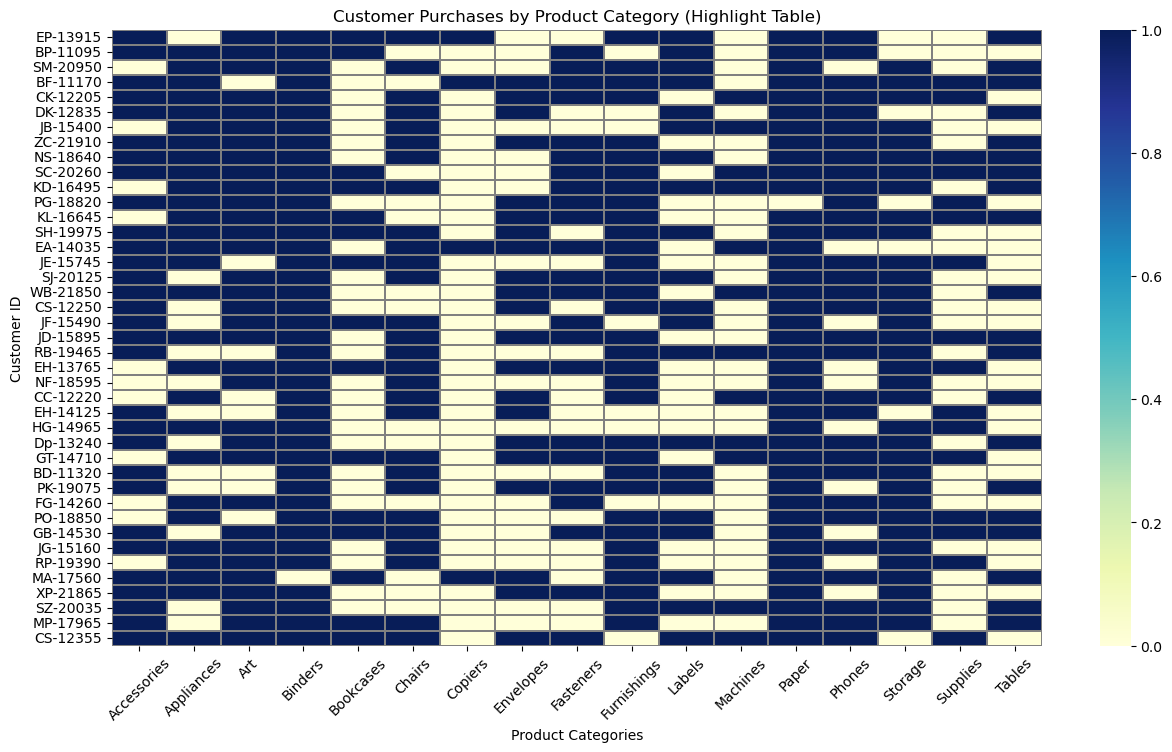

In [820]:
# Create the Heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(cust_freq3,  cmap="YlGnBu", linewidths=0.25, linecolor='gray', cbar=True)

# Formatting
plt.title("Customer Purchases by Product Category (Highlight Table)")
plt.xlabel("Product Categories")
plt.ylabel("Customer ID")
plt.xticks(rotation=45)  # Rotate category names for readability

# Show the plot
plt.show()

## 3. Market Basket Analysis 
### Analyze which product categories are often bought together and Identify opportunities to cross-sell or bundle products.

In [838]:
order_id = ord_aft_rtn.loc[:,['Order ID','Sub-Category']]
order_id=order_id.drop_duplicates().reset_index()
order_id['flag']=1

order_id = order_id.pivot(index='Order ID', columns='Sub-Category', values='flag' ).reset_index()

order_id1 = 1*(order_id.set_index('Order ID') > 0)

order_id2 = pd.DataFrame(data = order_id1.values.T@order_id1.values, columns = order_id1.columns, index = order_id1.columns)
order_id2

np.fill_diagonal(order_id2.values, 0)

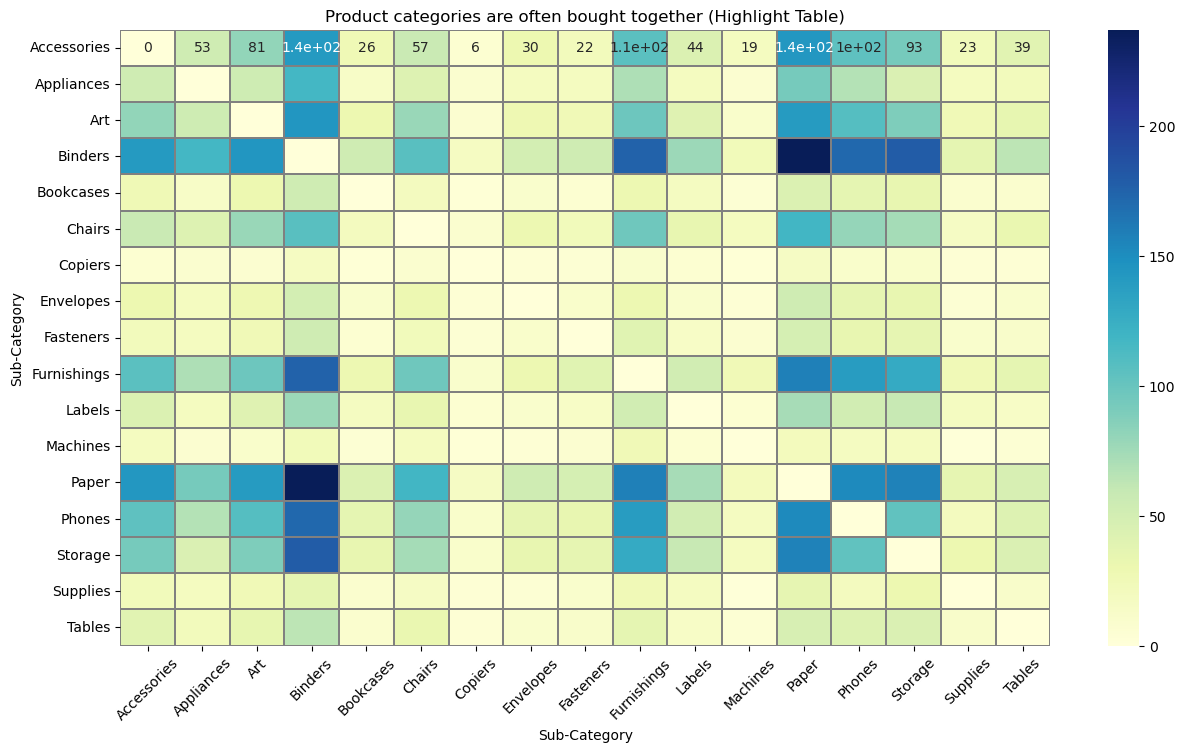

In [840]:
# Create the Heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(order_id2, annot=True, cmap="YlGnBu", linewidths=0.25, linecolor='gray', cbar=True)

# Formatting
plt.title("Product categories are often bought together (Highlight Table)")
plt.xlabel("Sub-Category")
plt.ylabel("Sub-Category")
plt.xticks(rotation=45)  # Rotate category names for readability

# Show the plot
plt.show()